<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_4_2_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 4.2. Graph and graph modeling**

Concepts covered:


* 4.2. Graph and graph modeling



# 4.2. Graph and graph modeling


Graphs are mathematical structures used to model relationships, consisting of nodes (vertices) and connections (edges). A graph $G$ is denoted as $G(V, E)$, where $V = \{v_1, v_2, \dots, v_n\}$ represents nodes and $E = \{e_1, e_2, \dots, e_m\}$ represents edges. Edges can be directed or undirected, defining directed graphs, undirected graphs, or mixed graphs.

A **path** in a graph is a sequence of edges connecting distinct nodes, while a **cycle** is a closed path. Usually, we have interest in finding the **shortest path** between two nodes and this serves as the basis for defining the $n$-hop neighborhood of a node. The **degree** of a node, indicating its connected edges, is central to graph analysis, with distinctions made between in-degree and out-degree for directed graphs.

Graphs can be represented by matrices. The **adjacency matrix** $A$ is an $n \times n$ matrix where $A_{ij} = 1$ if there is an edge between nodes $v_i$ and $v_j$, and 0 otherwise. Directed graphs result in asymmetric matrices, while undirected graphs produce symmetric matrices.

The **Laplacian matrix** $L$ is defined as:
$$
L_{ij} =
\begin{cases}
\sum_k E_{ik}, & i = j \\
-E_{ij}, & i \neq j \text{ and nodes } v_i, v_j \text{ are adjacent} \\
0, & \text{otherwise}.
\end{cases}
$$
This matrix is critical for analyzing properties like graph connectivity and spectral characteristics.

The **incidence matrix** $I_G$ encodes edge-node relationships, with entries representing edge weights and directions. For a weighted graph, properties like $L = I_G I_G^T$ relate these representations. Eigenvalues of $A$ and $L$ are used to measure graph centrality and structure, with the largest eigenvalue often identifying the most central node.

In examples, adjacency and Laplacian matrices are calculated for specific graphs, and eigenvalues/eigenvectors demonstrate how central nodes and edge weights influence graph behavior. For instance, eigenvector centrality highlights node significance, such as:
$$
(A - \lambda I)c = 0,
$$
where $c$ is the eigenvector and $\lambda$ is the eigenvalue.


# Code description

This code calculates the output of a simple neural network layer with two inputs, weights, a bias, and an activation function. It computes the linear combination $$ z = w_1 \cdot x_1 + w_2 \cdot x_2 + b $$ and then applies the sigmoid activation function $$ \hat{y} = \frac{1}{1 + e^{-z}} $$ to produce the final output. The result, $ \hat{y} $, represents the activated output of the layer given the specified parameters.

Adjacency List:
0: [1, 2, 4]
1: [0, 3, 5]
2: [0]
3: [1]
5: [1]
4: [0]

Adjacency Matrix:
[0 1 1 0 0 1]
[1 0 0 1 1 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]

DFS Traversal starting from vertex 3:
[3, 1, 0, 2, 4, 5]

Is the graph connected?
Yes

Eigenvalues of the Laplacian Matrix:
[4.56155281e+00 3.00000000e+00 4.48425140e-16 4.38447187e-01
 1.00000000e+00 1.00000000e+00]
Eigenvectors of the Laplacian Matrix:
 [[ 6.57192300e-01 -5.77350269e-01  4.08248290e-01 -2.60956474e-01
  -2.75494334e-18 -6.22638209e-17]
 [-6.57192300e-01 -5.77350269e-01  4.08248290e-01  2.60956474e-01
   3.66646636e-17  3.45707511e-17]
 [-1.84524092e-01  2.88675135e-01  4.08248290e-01 -4.64705132e-01
   1.87619600e-01 -7.06910345e-01]
 [ 1.84524092e-01  2.88675135e-01  4.08248290e-01  4.64705132e-01
  -6.81761605e-01 -1.66662711e-02]
 [ 1.84524092e-01  2.88675135e-01  4.08248290e-01  4.64705132e-01
   6.81761605e-01  1.66662711e-02]
 [-1.84524092e-01  2.88675135e-01  4.08248290e-01 -4.64705132e-01

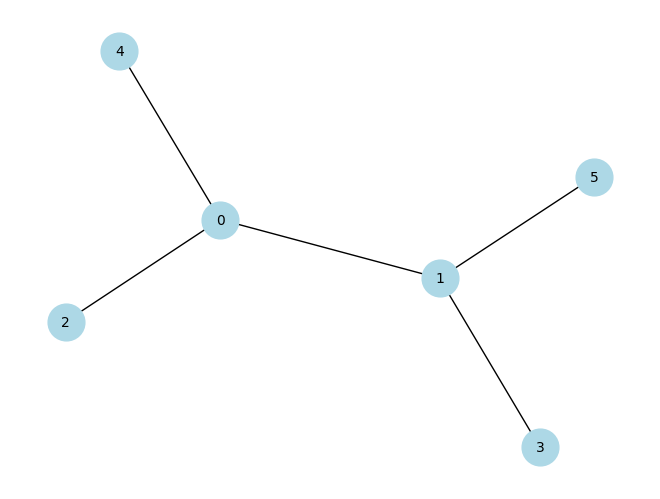

In [16]:
# will use the library networkx
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph using networkx
G = nx.Graph()

# Add edges to the graph, make it connected
edges = [(0, 1), (0, 2), (1, 3), (1, 5), (4, 0)]
G.add_edges_from(edges)

# Want to display graph representations
def display_adj_list(graph):
    print("Adjacency List:")
    # Loop through each node in the graph
    for node in graph.nodes():
        # For the current node, get its neighbors
        neighbors = list(graph.neighbors(node))
        # Print it
        print(f"{node}: {neighbors}")

# Use this to display the adjacency matrix
def display_adj_matrix(graph):
    print("Adjacency Matrix:")
    # Get the adjacency matrix and convert its format
    matrix = nx.adjacency_matrix(graph).todense()
    # now print each row from the matrix
    for row in matrix:
        print(row)

# Perform a Depth-First Search (DFS), a popular technique
def dfs(graph, start):
    # use this list to keep track of visited nodes
    visited = []
    #  use stack to manage nodes for traversal
    stack = [start]

    # loop until becomes empty
    while stack:
        # pop the top node from stack
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            # add unvisited neighbors to stack in reverse order
            stack.extend(reversed(list(graph.neighbors(node))))

    return visited

# Check if the graph is connected
def is_connected(graph):
    return nx.is_connected(graph)

# Eigenvalue and Eigenvector calculations (Laplacian matrix)
def compute_laplacian_eigen(graph):
    # Get adjacency matrix and degree matrix
    A = nx.adjacency_matrix(graph).todense()
    degree_matrix = np.diag(np.sum(A, axis=1))

    # Compute the Laplacian matrix: L = D - A
    L = degree_matrix - A

    # Compute the eigenvalues and eigenvectors of the Laplacian matrix
    eigenvalues, eigenvectors = np.linalg.eig(L)

    return eigenvalues, eigenvectors

# Display Eigenvalues and Eigenvectors
def display_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    print("Eigenvalues of the Laplacian Matrix:")
    print(eigenvalues)
    print("Eigenvectors of the Laplacian Matrix:\n", eigenvectors)

# Find the second smallest eigenvalue (Fiedler value) and Fiedler vector
def display_fiedler_vector(eigenvalues, eigenvectors):
    nonzero_eigenvalues = eigenvalues[np.abs(eigenvalues) > 1e-10]
    second_smallest_eigenvalue = np.sort(nonzero_eigenvalues)[0]
    print(f"Second smallest eigenvalue (Fiedler value): {second_smallest_eigenvalue}")

    fiedler_vector = eigenvectors[:, np.argsort(eigenvalues)[1]]
    print("Fiedler Vector:", fiedler_vector)

# Display the represenations of the graph
display_adj_list(G)
print()
display_adj_matrix(G)
print()

# Perform DFS starting from vertex 3
print("DFS Traversal starting from vertex 3:")
print(dfs(G, 3))
print()

# Check if the graph is connected
print("Is the graph connected?")
print("Yes" if is_connected(G) else "No")
print()

# Eigenvalue and Eigenvector calculations
eigenvalues, eigenvectors = compute_laplacian_eigen(G)
display_eigenvalues_eigenvectors(eigenvalues, eigenvectors)
display_fiedler_vector(eigenvalues, eigenvectors)

# Provide a visualization of the graph
print("Graph Visualization:")
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10)
plt.show()
